### 웹크롤링 방법
- 동적페이지 : URL의 변경 없이 페이지의 내용이 변경 : json
- 정적페이지 : URL이 변경되면서 페이지의 내용이 변경 : html

In [140]:
import pandas as pd
import requests

### 네이버 주가 데이터 수집
- 동적페이지 : JSON

In [141]:
# 1. 웹서비스 분석 : 개발자 도구 : URL

In [142]:
page_size, page=20,1
url = f'https://m.stock.naver.com/api/index/KOSPI/price?pageSize={page_size}&page={page}'
url

'https://m.stock.naver.com/api/index/KOSPI/price?pageSize=20&page=1'

In [143]:
# 2. 서버에 데이터 요청 : request(URL) > response(JSON(str))

In [144]:
response = requests.get(url)
response

<Response [200]>

In [74]:
response.text[:200]

'[{"localTradedAt":"2022-02-21","closePrice":"2,730.63","compareToPreviousClosePrice":"-13.89","compareToPreviousPrice":{"code":"5","text":"하락","name":"FALLING"},"fluctuationsRatio":"-0.51","openPrice"'

In [75]:
# 3. JSON(str) > parsion > dict,list  > DataFrame 

In [76]:
datas = response.json()
type(datas)

list

In [77]:
kospi_df = pd.DataFrame(datas)
kospi_df.head()

,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
0,2022-02-21,"2,730.63",-13.89,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.51,"2,706.65","2,739.95","2,694.90"
1,2022-02-18,"2,744.52",0.43,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.02,"2,714.52","2,747.08","2,711.88"
2,2022-02-17,"2,744.09",14.41,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.53,"2,735.11","2,770.66","2,711.99"
3,2022-02-16,"2,729.68",53.14,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.99,"2,719.61","2,730.43","2,711.34"
4,2022-02-15,"2,676.54",-27.94,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.03,"2,712.45","2,716.45","2,665.47"


In [78]:
colums=["localTradedAt","closePrice"]
kospi_df = pd.DataFrame(datas)[colums]
kospi_df.head()

,localTradedAt,closePrice
0,2022-02-21,"2,730.63"
1,2022-02-18,"2,744.52"
2,2022-02-17,"2,744.09"
3,2022-02-16,"2,729.68"
4,2022-02-15,"2,676.54"


In [79]:
len(kospi_df)

20

In [80]:
# 4. 함수로 만들기

In [81]:
def stock_price(code="KOSPI",page_size=20,page=1):
    """
    params: code(KOSPI or KOSDAQ)
    """
    url = f"https://m.stock.naver.com/api/index/{code}/price?pageSize={page_size}&page={page}"
    response = requests.get(url)
    datas=response.json()
    return pd.DataFrame(datas)[["localTradedAt","closePrice"]]


In [89]:
df = stock_price("KOSDAQ")
df.head(2)

,localTradedAt,closePrice
0,2022-02-21,877.44
1,2022-02-18,881.71


In [83]:
# 5. 실습 : 원달러 환율 데이터 수집

In [90]:
def exchange_rate(code="FX_USDKRW", page_size=20, page=1):
    url = f"https://api.stock.naver.com/marketindex/exchange/{code}/prices?page={page}&pageSize={page_size}"
    response = requests.get(url)
    datas = response.json()
    return pd.DataFrame(datas)[["localTradedAt", "closePrice"]]

In [91]:
usd = exchange_rate()
usd.head()

,localTradedAt,closePrice
0,2022-02-21,"1,193.90"
1,2022-02-18,"1,195.50"
2,2022-02-17,"1,197.50"
3,2022-02-16,"1,198.00"
4,2022-02-15,"1,197.50"


In [86]:
# 시각화 및 상관관계 분석

In [92]:
%config InlineBackend.figure_formats = {'png', 'retina'}

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# 데이터 수집 : kospi, kosdaq, usd
kospi = stock_price()
kosdaq = stock_price("KOSDAQ")
usd = exchange_rate()

In [112]:
# 데이터 전처리 : str > float
kospi.dtypes

localTradedAt     object
closePrice       float64
dtype: object

In [114]:
kospi["closePrice"] = kospi["closePrice"].apply(lambda data: float(data.replace(",", "")))

In [115]:
kosdaq["closePrice"] = kosdaq["closePrice"].apply(lambda data: float(data.replace(",", "")))
usd["closePrice"] = usd["closePrice"].apply(lambda data: float(data.replace(",", "")))

In [116]:
usd.dtypes

localTradedAt     object
closePrice       float64
dtype: object

In [117]:
# lambda : 일회성 함수 : lambda params :return

In [118]:
def plus(num1, num2):
    return num1 + num2

def minus(num1, num2):
    return num1 - num2

def calc(func, num1, num2):
    return func(num1, num2)

In [119]:
calc(plus,1,2)

3

In [120]:
# apply(func) : 모든 데이터에 func를 적용시킨 것을 출력

In [130]:
df = kospi.copy()
df = df.rename(columns={"localTradedAt": "date", "closePrice": "kospi"})
df["kosdaq"] = kosdaq["closePrice"]
df["usd"] = usd["closePrice"]
df.head()

,date,kospi,kosdaq,usd
0,2022-02-21,2729.04,876.90,1194.1
1,2022-02-18,2744.52,881.71,1195.5
2,2022-02-17,2744.09,874.22,1197.5
3,2022-02-16,2729.68,878.15,1198.0
4,2022-02-15,2676.54,839.92,1197.5


In [131]:
df.dtypes

date       object
kospi     float64
kosdaq    float64
usd       float64
dtype: object

In [132]:
# 그래프 그리기

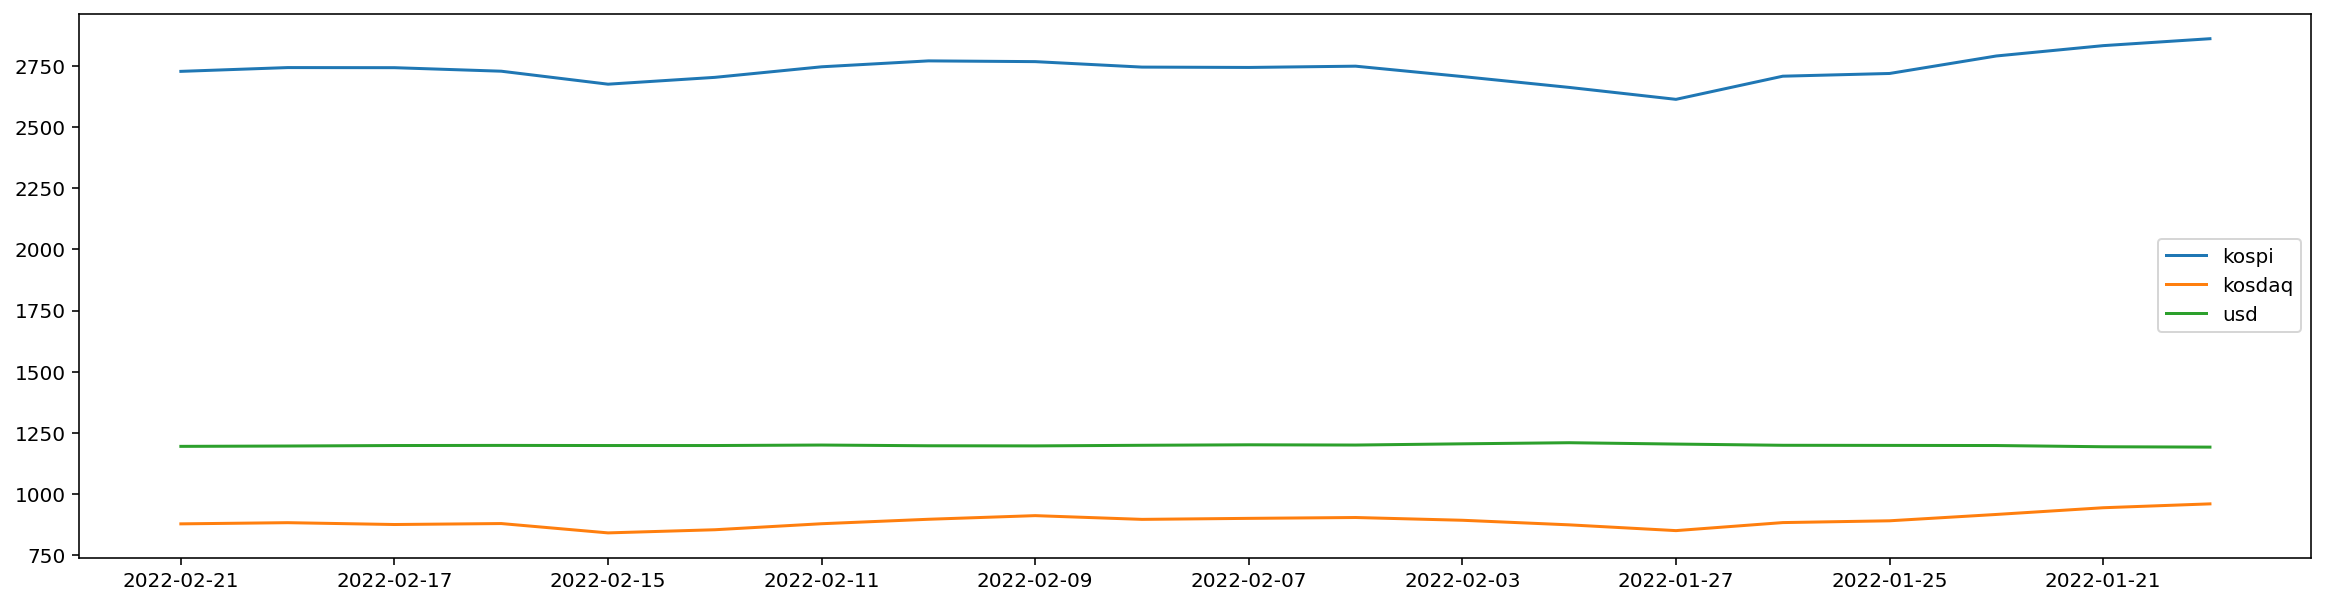

In [135]:
plt.figure(figsize=(20, 5))

# plt.plot(df["date"], df["kospi"], label="kospi")
# plt.plot(df["date"], df["kosdaq"], label="kosdaq")
# plt.plot(df["date"], df["usd"], label="usd")

for column in df.columns[1:]:
    plt.plot(df["date"], df[column], label=column)

plt.xticks(df["date"][::2])
plt.legend()
plt.show()

In [136]:
# 데이터 스케일링 : min max scale
# z= (x - min(x) / (max(x) - min(x)) : 0 <=z <=1

In [137]:
# 상관관계 분석
# 상관계수 : 0과 가까울수룩 두데이터는 관계가 없다.
#1과 가까울수록 두데이터는 강한 양의 상관관계를 갖는다.
# -1과 가까울수룩 두 데이터는 강한 음의 상관관계를 갖는다.

In [138]:
# kospi - kosdaq : 0.892 : 강한 양의 상관관계
# kospi - usd : -0.745 : 강한 음의 상관관계

In [139]:
df[df.columns[1:]].corr()

,kospi,kosdaq,usd
kospi,1.000000,0.892899,-0.736544
kosdaq,0.892899,1.000000,-0.493317
usd,-0.736544,-0.493317,1.000000
